In [125]:
import pandas as pd
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab as pl

### Read loans.csv as a Pandas Dataframe

In [126]:
df = pd.read_csv('loans.csv', header=None)
df.columns = ['loan_amount', 'address', 'created_at', 'funded_at']

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5143 entries, 0 to 5142
Data columns (total 4 columns):
loan_amount    5143 non-null float64
address        5143 non-null object
created_at     5143 non-null object
funded_at      1055 non-null object
dtypes: float64(1), object(3)
memory usage: 160.8+ KB


### Some information about the data: <br> Total rows: 5143 <br> No null entries in columns loan_amount, address, created_at <br> 1055 non-null entries in funded_at <br> Which means 1055 loan applications have been funded which is 20% of the total applications

In [128]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['funded_at'] = pd.to_datetime(df['funded_at'])

# Outlier Removal
## To find the outliers in the column loan_amount, I took the mean of the column and removed all the values which are two standard deviations away from the mean

In [129]:
df['loan_amount'].mean()

382389.44273770176

### Mean before removing outliers is 382389

In [130]:
def show_normal_dist(arr):
    h = sorted(arr)
    fit = stats.norm.pdf(h, np.mean(h), np.std(h))
    pl.plot(h,fit,'-o')
    pl.hist(h,normed=True)
    pl.show()

### Normal distribution of loan_amount before removing outliers: LOOKS REALLY BAD <br> Lets get this curve right


/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


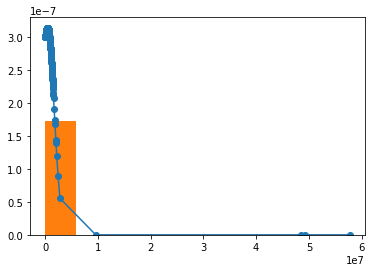

In [131]:
show_normal_dist(df['loan_amount'])

### remove_outliers() method, identifies the values which two standard deviations away from the mean as outliers

In [132]:
def remove_outliers(arr):
    elements = np.array(arr)
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    no_outliers_list = [x for x in arr if (x > mean - 2 * sd)]
    no_outliers_list = [x for x in no_outliers_list if (x < mean + 2 * sd)]
    return no_outliers_list

In [133]:
no_outliers_list = remove_outliers(df['loan_amount'])

In [134]:
len(no_outliers_list)

5139

### Also removed the values whose loan rwuest amount is less than $1000

In [135]:
low_outliers = sorted(i for i in no_outliers_list if i < 1000)

In [136]:
low_outliers

[9.0]

In [137]:
no_outliers_list = no_outliers_list

In [138]:
np.mean(no_outliers_list)

350562.93500681064

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


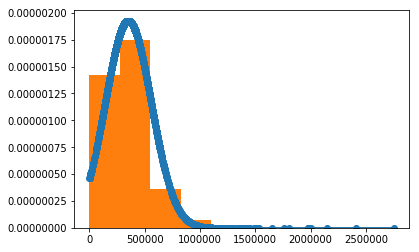

In [139]:
show_normal_dist(no_outliers_list)

### Mean after removing outliers is 349750 <br> So removing outliers caused the mean to reduce by $31,827 <br> And as you see above, we have a much better and pronounced normal dist curve

### Let's see which values were the outliers

In [140]:
def get_list_intersection(list1, list2):
    return[x for x in list1 if x not in list2]    

In [141]:
outliers = get_list_intersection(list(df['loan_amount']), no_outliers_list)

### Following command removes the outliers from the dataframe
### 4 values having very haigh values are removed

In [142]:
df_no_outliers = df[~df['loan_amount'].isin(outliers)]

### The above outlier values are very large and away from the mean, hence they are removed from the original dataframe <br> After removing the above four outliers, the number of loan applications now is 5139

In [143]:
df_sorted_date = df_no_outliers.sort_values(by = ['created_at'], ascending=True)

In [20]:
# group by month
# find conversion rate in each month
# do the same for last 30, 60 days

# create a new df with funded loans
# find the time difference in approval for all
# VISUALIZE

## Next step is to divide the dataframe as per the years and months and deciper the mystery of the conversion rates

In [145]:
df_sorted_date['created_at_month'] = df_sorted_date['created_at'].dt.month
df_sorted_date['created_at_year'] = df_sorted_date['created_at'].dt.year

In [146]:
df_sorted_date['created_at_year'].value_counts()

2017    4189
2016     950
Name: created_at_year, dtype: int64

## As it can be seen above, there were 950 and 4189 valid loan applications in 2016 and 2017 respectively <br><br> Lets try to see what's happenig for each year, month and quarter

In [147]:
df_2016 = df_sorted_date[df_sorted_date['created_at_year'] == 2016]
df_2017 = df_sorted_date[df_sorted_date['created_at_year'] == 2017]

# First up is year 2016

In [148]:
def get_funded_per_month(df_year):
    results_list = []
    for i in range(1,13):        
        try:
            df_month = df_year.groupby(by='created_at_month').get_group(i)
            results_list.append({'month': i, 
                                 'total_applications': len(df_month), 
                                 'funded_applications': len(df_month[~df_month['funded_at'].isnull()])})
            
        except KeyError:
            continue
    return results_list
        


In [149]:
get_funded_per_month(df_2016)

[{'funded_applications': 0, 'month': 2, 'total_applications': 1},
 {'funded_applications': 0, 'month': 3, 'total_applications': 9},
 {'funded_applications': 0, 'month': 4, 'total_applications': 32},
 {'funded_applications': 0, 'month': 5, 'total_applications': 45},
 {'funded_applications': 1, 'month': 6, 'total_applications': 2},
 {'funded_applications': 2, 'month': 7, 'total_applications': 3},
 {'funded_applications': 15, 'month': 8, 'total_applications': 15},
 {'funded_applications': 119, 'month': 9, 'total_applications': 119},
 {'funded_applications': 167, 'month': 10, 'total_applications': 169},
 {'funded_applications': 85, 'month': 11, 'total_applications': 242},
 {'funded_applications': 60, 'month': 12, 'total_applications': 313}]

## Above dictionary tells the number of total applications and funded applications for every month in the year 2016 <br><br> Following are the same findings for the year 2017

In [150]:
get_funded_per_month(df_2017)

[{'funded_applications': 61, 'month': 1, 'total_applications': 544},
 {'funded_applications': 45, 'month': 2, 'total_applications': 257},
 {'funded_applications': 35, 'month': 3, 'total_applications': 224},
 {'funded_applications': 27, 'month': 4, 'total_applications': 169},
 {'funded_applications': 61, 'month': 5, 'total_applications': 209},
 {'funded_applications': 87, 'month': 6, 'total_applications': 414},
 {'funded_applications': 75, 'month': 7, 'total_applications': 481},
 {'funded_applications': 75, 'month': 8, 'total_applications': 521},
 {'funded_applications': 61, 'month': 9, 'total_applications': 469},
 {'funded_applications': 67, 'month': 10, 'total_applications': 411},
 {'funded_applications': 12, 'month': 11, 'total_applications': 352},
 {'funded_applications': 0, 'month': 12, 'total_applications': 138}]

# DIFFERENCE IN TIMES

In [151]:
df_2016_funded = df_2016[~df_2016['funded_at'].isnull()]

In [152]:
df_2016_funded['time_to_fund'] = (df_2016_funded['funded_at'] - df_2016_funded['created_at']).dt.days

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
df_2017_funded = df_2017[~df_2017['funded_at'].isnull()]

In [155]:
df_2017_funded['time_to_fund'] = (df_2017_funded['funded_at'] - df_2017_funded['created_at']).dt.days

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
What is the conversion rate from loan application to fund, broken down by conforming vs jumbo?
How does it vary over time?
How much worse is the conversion rate for jumbo, controlling for the loan amount?
What about states? Are there particular states where it looks like our Jumbo has much worse conversion?

## Method get_county_code_from_address(address, year) receives address and the year and returns the county code for that address <br><br> Method get_state_code_from_address(address, year) receives address and the year and returns the state code for that address <br><br> Method get_state_abbr_from_address(address, year) receives address and the year and returns the state abbrevation for that address

In [217]:
import requests
import json
def get_county_code_from_address(address, year):
    header_obj = { 'Content-Type': 'application/json' }
    payload_obj = {'sSingleLine': address, 'iCensusYear': year}
    r = requests.post(
        'https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx/GetGeocodeData',
        data = json.dumps(payload_obj),
        headers = header_obj
    )
    response = json.loads(r.text)
    return response['d']['sCountyCode']

In [ ]:
def get_state_code_from_address(address, year):
    header_obj = { 'Content-Type': 'application/json' }
    payload_obj = {'sSingleLine': address, 'iCensusYear': year}
    r = requests.post(
        'https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx/GetGeocodeData',
        data = json.dumps(payload_obj),
        headers = header_obj
    )
    response = json.loads(r.text)
    return response['d']['sStateCode']

In [ ]:
def get_state_abbr_from_address(address, year):
    header_obj = { 'Content-Type': 'application/json' }
    payload_obj = {'sSingleLine': address, 'iCensusYear': year}
    r = requests.post(
        'https://geomap.ffiec.gov/FFIECGeocMap/GeocodeMap1.aspx/GetGeocodeData',
        data = json.dumps(payload_obj),
        headers = header_obj
    )
    response = json.loads(r.text)
    return response['d']['sStateAbbr']

## The new dataframe with county codes,state codes and state abbrevation is stored as a CSV file (2016, 2017) <br><br> PS: If you will be running the notebook, do not run the following two cells, as they would take a long time to get the details from REST API. Instead use the CSV files directly which contains the results obtained from the API.

In [204]:
df_2016['county_code'] = df_2016['address'].apply(get_county_code_from_address, year=2016)
df_2016['state_code'] = df_2016['address'].apply(get_state_code_from_address, year=2016)
df_2016['state_abbr'] = df_2016['address'].apply(get_state_abbr_from_address, year=2016)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_2017['county_code'] = df_2017['address'].apply(get_county_code_from_address, year=2017)
df_2017['state_code'] = df_2017['address'].apply(get_state_code_from_address, year=2017)
df_2017['state_abbr'] = df_2017['address'].apply(get_state_abbr_from_address, year=2017)

### Save the new dataframes as CSV

In [256]:
df_2016['county_code'] = df_2016['county_code'].astype('str')
df_2016.to_csv('loans_2016.csv')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [260]:
df_2017['county_code'] = df_2017['county_code'].astype('str')
df_2017.to_csv('loans_2017.csv')

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Now lets find what is the loan limits for each county code in the dataframe

In [ ]:
import xlrd

#### Read the XLS file which contains the loan limits for each counties <br> Converting first row as header

In [282]:
df_county_info_2017 = pd.read_excel('FullCountyLoanLimitList2017_HERA-BASED_FINAL_FLAT.xlsx')
df_county_info_2017 = df_county_info_2017.rename(columns=df_county_info_2017.iloc[0])
df_county_info_2017 = df_county_info_2017[1:]
df_county_info_2017.rename(columns={"FIPS County Code": "county_code", "State": "state_abbr"}, inplace=True)

df_county_info_2016 = pd.read_excel('FullCountyLoanLimitList2016_HERA-BASED_FINAL_FLAT.xlsx')
df_county_info_2016 = df_county_info_2016.rename(columns=df_county_info_2016.iloc[0])
df_county_info_2016 = df_county_info_2017[1:]
df_county_info_2016.rename(columns={"FIPS County Code": "county_code", "State": "state_abbr"}, inplace=True)

/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/frame.py:3027: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


#### Read the previously created CSV file for both 2016 and 2017

In [284]:
df_2017_N = pd.read_csv('loans_2017.csv', dtype={'county_code': object})
df_2017_N.rename(columns={"Unnamed: 0": "id"}, inplace=True)

df_2016_N = pd.read_csv('loans_2016.csv', dtype={'county_code': object})
df_2016_N.rename(columns={"Unnamed: 0": "id"}, inplace=True)

## Perform a Merge(INNER JOIN) on columns `county_code` and `state_abbr` so that we know what is the loan limit for each county along with the loan amount 

In [294]:
df_2017_all = df_2017_N.merge(df_county_info_2017, how='inner', on=['county_code', 'state_abbr'])
df_2017_all.rename(columns={'One-Unit Limit': 'one_unit_limit', 'Two-Unit Limit': 'two_unit_limit',
                           'Three-Unit Limit': 'three_unit_limit', 'Four-Unit Limit': 'four_unit_limit'}, inplace=True)

In [295]:
df_2016_all = df_2016_N.merge(df_county_info_2016, how='inner', on=['county_code', 'state_abbr'])
df_2016_all.rename(columns={'One-Unit Limit': 'one_unit_limit', 'Two-Unit Limit': 'two_unit_limit',
                           'Three-Unit Limit': 'three_unit_limit', 'Four-Unit Limit': 'four_unit_limit'}, inplace=True)

## Now we have two dataframes with the loan amount, county and the loan limit for each county. <br><br> Hence, we can begin the findings on conforming and jumbo loans

### As nothing has been specified, I considered a `two_unit_limit` as the standard limit for indentifying the loan<br> If the `loan_amount` is greater that county limit, it is `jumbo`, if less then `conforming`<br><br> `find_loan_type()` finds the loan type for each loan application

In [308]:
def find_loan_type(row):
    if row['loan_amount'] > row['two_unit_limit']:
        return 'jumbo'
    else:
        return 'conforming'

In [309]:
df_2017_all['loan_type'] = df_2017_all.apply(find_loan_type, axis=1)

In [310]:
df_2016_all['loan_type'] = df_2016_all.apply(find_loan_type, axis=1)

In [312]:
df_2017_all['loan_type'].value_counts()

conforming    3703
jumbo          180
Name: loan_type, dtype: int64

In [313]:
df_2016_all['loan_type'].value_counts()

conforming    871
jumbo          15
Name: loan_type, dtype: int64

# What is the conversion rate from loan application to fund, broken down by conforming vs jumbo?

## First Up is year 2017

In [325]:
df_2017_conforming = df_2017_all[df_2017_all['loan_type'] == 'conforming']
df_2017_jumbo = df_2017_all[df_2017_all['loan_type'] == 'jumbo']

In [326]:
df_2017_conforming_funded = df_2017_conforming[~df_2017_conforming['funded_at'].isnull()]

In [327]:
len(df_2017_conforming_funded)

558

In [328]:
len(df_2017_conforming)

3703

### For year 2017, `558` out of `3703` `conforming` loans have been funded till Dec 2017

In [329]:
df_2017_jumbo_funded = df_2017_jumbo[~df_2017_jumbo['funded_at'].isnull()]

In [330]:
len(df_2017_jumbo_funded)

6

In [331]:
len(df_2017_jumbo)

180

### For year 2017, `6` out of `180` `jumbo` loans have been funded till Dec 2017

## Next is year 2016

In [332]:
df_2016_conforming = df_2016_all[df_2016_all['loan_type'] == 'conforming']
df_2016_jumbo = df_2016_all[df_2016_all['loan_type'] == 'jumbo']

In [333]:
df_2016_conforming_funded = df_2016_conforming[~df_2016_conforming['funded_at'].isnull()]

In [334]:
len(df_2016_conforming_funded)

413

In [335]:
len(df_2016_conforming)

871

### For year 2016, `413` out of `871` `conforming` loans have been funded till Dec 2016

In [337]:
df_2016_jumbo_funded = df_2016_jumbo[~df_2016_jumbo['funded_at'].isnull()]

In [338]:
len(df_2016_jumbo_funded)

0

In [339]:
len(df_2016_jumbo)

15

### For year 2016, None of the `jumbo` loans have been funded till Dec 2016

# How much does it vary over time?

### `get_funded_per_month()` method is used to see the number of funded applications and total applications for every month of the year 2016 and 2017 according to its loan type

### Below is the dictionary which contains the number of funded and total application grouped by month for year `2017` for the `conforming` loans

In [344]:
get_funded_per_month(df_2017_conforming)

[{'funded_applications': 56, 'month': 1, 'total_applications': 463},
 {'funded_applications': 41, 'month': 2, 'total_applications': 230},
 {'funded_applications': 32, 'month': 3, 'total_applications': 197},
 {'funded_applications': 26, 'month': 4, 'total_applications': 147},
 {'funded_applications': 52, 'month': 5, 'total_applications': 186},
 {'funded_applications': 80, 'month': 6, 'total_applications': 378},
 {'funded_applications': 69, 'month': 7, 'total_applications': 427},
 {'funded_applications': 72, 'month': 8, 'total_applications': 464},
 {'funded_applications': 57, 'month': 9, 'total_applications': 419},
 {'funded_applications': 62, 'month': 10, 'total_applications': 356},
 {'funded_applications': 11, 'month': 11, 'total_applications': 315},
 {'funded_applications': 0, 'month': 12, 'total_applications': 121}]

### Below is the dictionary which contains the number of funded and total application grouped by month for year `2017` for the `jumbo` loans

In [345]:
get_funded_per_month(df_2017_jumbo)

[{'funded_applications': 1, 'month': 1, 'total_applications': 37},
 {'funded_applications': 0, 'month': 2, 'total_applications': 9},
 {'funded_applications': 0, 'month': 3, 'total_applications': 14},
 {'funded_applications': 0, 'month': 4, 'total_applications': 7},
 {'funded_applications': 2, 'month': 5, 'total_applications': 6},
 {'funded_applications': 0, 'month': 6, 'total_applications': 12},
 {'funded_applications': 1, 'month': 7, 'total_applications': 16},
 {'funded_applications': 1, 'month': 8, 'total_applications': 22},
 {'funded_applications': 0, 'month': 9, 'total_applications': 22},
 {'funded_applications': 1, 'month': 10, 'total_applications': 22},
 {'funded_applications': 0, 'month': 11, 'total_applications': 7},
 {'funded_applications': 0, 'month': 12, 'total_applications': 6}]

### Below is the dictionary which contains the number of funded and total application grouped by month for year `2016` for the `conforming` loans

In [346]:
get_funded_per_month(df_2016_conforming)

[{'funded_applications': 0, 'month': 2, 'total_applications': 1},
 {'funded_applications': 0, 'month': 3, 'total_applications': 9},
 {'funded_applications': 0, 'month': 4, 'total_applications': 28},
 {'funded_applications': 0, 'month': 5, 'total_applications': 42},
 {'funded_applications': 1, 'month': 6, 'total_applications': 2},
 {'funded_applications': 2, 'month': 7, 'total_applications': 3},
 {'funded_applications': 14, 'month': 8, 'total_applications': 14},
 {'funded_applications': 112, 'month': 9, 'total_applications': 112},
 {'funded_applications': 149, 'month': 10, 'total_applications': 150},
 {'funded_applications': 79, 'month': 11, 'total_applications': 230},
 {'funded_applications': 56, 'month': 12, 'total_applications': 280}]

### Below is the dictionary which contains the number of funded and total application grouped by month for year `2016` for the `jumbo` loans

In [347]:
get_funded_per_month(df_2016_jumbo)

[{'funded_applications': 0, 'month': 4, 'total_applications': 2},
 {'funded_applications': 0, 'month': 11, 'total_applications': 1},
 {'funded_applications': 0, 'month': 12, 'total_applications': 12}]